# Assignment #5 - Deep Learning (Extra Credits)

<font color="blue"><b> Abdullah Al Raqibul Islam </b></font>

# INDEX

**I. Overview**<br/>
II. Data<br/>
&emsp;&emsp;II.I. Introduction of Classification Data<br/>
&emsp;&emsp;&emsp;&emsp;II.I.I. Reading the data<br/>
&emsp;&emsp;&emsp;&emsp;II.I.II. Preprocessing of the data<br/>
&emsp;&emsp;&emsp;&emsp;II.I.III. Visualization of the data<br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;II.I.III.I. Correlation Heatmap<br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;II.I.III.II. Pie-chart<br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;II.I.III.III. Bar Graph<br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;II.I.IV. Preliminary observation<br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;II.I.V. Preprocessing for Classification<br/>
&emsp;&emsp;&emsp;&emsp;II.I.IV. Preliminary observation<br/>
&emsp;&emsp;&emsp;&emsp;II.I.V. Preprocessing for Classification<br/>
**III. Methods**<br/>
&emsp;&emsp;**III.I. Model Selection**<br/>
&emsp;&emsp;&emsp;&emsp;**III.I.I. Selection Choice: Model 1**<br/>
&emsp;&emsp;&emsp;&emsp;**III.I.II. Selection Choice: Model 2**<br/>
&emsp;&emsp;&emsp;&emsp;**III.I.III. Selection Choice: Model 3**<br/>
&emsp;&emsp;**III.II. Experiments**<br/>
&emsp;&emsp;&emsp;&emsp;III.II.I. Feature Selection<br/>
&emsp;&emsp;&emsp;&emsp;**III.II.II. Code Explanation: Model-1**<br/>
&emsp;&emsp;&emsp;&emsp;**III.II.III. Code Explanation: Model-2**<br/>
&emsp;&emsp;&emsp;&emsp;**III.II.IV. Code Explanation: Model-3**<br/>
**IV. Results**<br/>
&emsp;&emsp;**IV.I. Model-1: Result Analysis**<br/>
&emsp;&emsp;**IV.II. Model-2: Result Analysis**<br/>
&emsp;&emsp;**IV.III. Model-3: Result Analysis**<br/>
&emsp;&emsp;**IV.IV. Observations**<br/>
**V. Conclusions**<br/>
**VI. Optional Extra Credits**<br/>
VII. References<br/>
VIII. Grading

# I. Overview

The objective of this assignment is to build deep networks with more than 5 layers using Keras. By extensive experimentation and evaluation, I will explore the impact of different deep network components: the number of layers, number of neurons per layer, different activation functions, etc. I have used classification data from my previous assignments and done preprocessing and visualization before classifying those data. I have used the `Sequential` model from `Keras` to create different deep neural network structures.

# II. Data

Agenda:
- Introduce your data and visualize them. Describe your observations about the data.
- You can reuse the data that you examined in Assignment #0 (of course for classification). 

## II.I. Introduction of Classification Data

This dataset [[1]](https://www.kaggle.com/lodetomasi1995/income-classification) contains person's income information with 14 attributes. The dataset have `32561` rows in total. Here is the attribute list along with the data-type.

**Attribute Information:**
 0.   age (int64) 
 1.   workclass (object)
 2.   fnlwgt (int64)
 3.   education (object)
 4.   education-num (int64)
 5.   marital-status (object)
 6.   occupation (object)
 7.   relationship (object)
 8.   race (object)
 9.   sex (object)
 10.  capital-gain (int64)
 11.  capital-loss (int64)
 12.  hours-per-week (int64)
 13.  native-country (object)
 14.  income (object)

### II.I.I. Reading the data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data from csv datafile; using read_csv method from Pandas library
df_c = pd.read_csv("data/classification/income_evaluation.csv", sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

# displaying all the columns data of top 10 rows in the jupyter notebook
pd.set_option('max_columns', 28)
df_c.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### II.I.II. Preprocessing of the data

In [7]:
# get the metadata; getting familiarized with columns and data-types
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From the "Non-Null Count" column above, we can observe all the rows contain same number of non-null counts. From this data we can sense that there is no null values in this dataset.

To confirm this, let's check it using library function.

In [8]:
# checking columns with null values
df_c.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

But we can observe that a couple of columns contains hypens (`-`). Cleaning up the column names that have `-` in the dataframe.

In [9]:
# clean up column names that have '-' in the dataframe

cols = df_c.columns
new_column_names = []

for col in cols:
    new_col = col.lstrip().rstrip().replace ("-", "_")
    new_column_names.append(new_col)

df_c.columns = new_column_names

df_c.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Now will check the unique values in the target column (i.e. `income`) and replace the values with more meaningfull name (i.e. `Low-income`, `High-income`).

In [10]:
df_c.loc[df_c['income'] == '<=50K', 'income'] = 'Low-income'
df_c.loc[df_c['income'] == '>50K', 'income'] = 'High-income'

df_c.income.unique()

array(['Low-income', 'High-income'], dtype=object)

There is no null values in any particular columns. So we don't need to perform any data pre-processing here.

### II.I.III. Visualization of the data

#### II.I.III.I. Correlation Heatmap

Corelation heatmap is provided bellow. Here I am listing my observations from the correlation heatmap:

1. As `income` is a object type data, we can't retrieve correlation information w.r.t. that. This has been further discussed in section $II.I.V$.

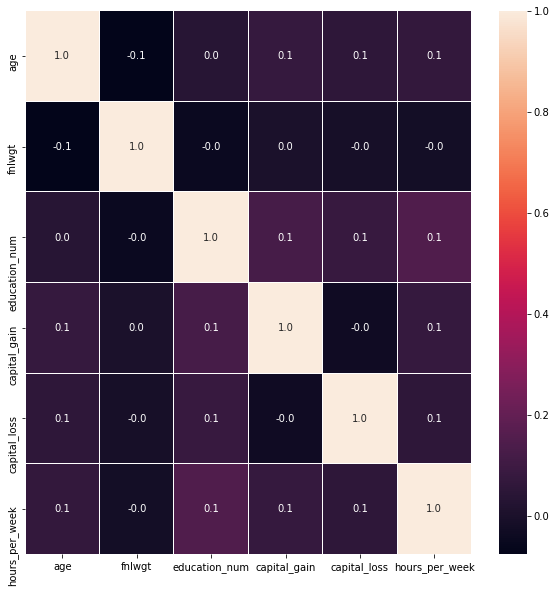

In [11]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(df_c.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

#### II.I.III.II. Pie-chart

In [12]:
eduList = []
eduCount = []
for edu_name, subset in df_c.groupby('education'):
    eduList.append(edu_name)
    eduCount.append(len(subset))
print(eduList)
print(eduCount)

workclassList = []
workclassCount = []
for class_name, subset in df_c.groupby('workclass'):
    workclassList.append(class_name)
    workclassCount.append(len(subset))
print(workclassList)
print(workclassCount)

maritalList = []
maritalCount = []
for marital_name, subset in df_c.groupby('marital_status'):
    maritalList.append(marital_name)
    maritalCount.append(len(subset))
print(maritalList)
print(maritalCount)

occupationList = []
occupationCount = []
for occupation_name, subset in df_c.groupby('occupation'):
    occupationList.append(occupation_name)
    occupationCount.append(len(subset))
print(occupationList)
print(occupationCount)

relationshipList = []
relationshipCount = []
for relationship_name, subset in df_c.groupby('relationship'):
    relationshipList.append(relationship_name)
    relationshipCount.append(len(subset))
print(relationshipList)
print(relationshipCount)

raceList = []
raceCount = []
for race_name, subset in df_c.groupby('race'):
    raceList.append(race_name)
    raceCount.append(len(subset))
print(raceList)
print(raceCount)

sexList = []
sexCount = []
for sex_name, subset in df_c.groupby('sex'):
    sexList.append(sex_name)
    sexCount.append(len(subset))
print(sexList)
print(sexCount)

countryList = []
countryCount = []
for country_name, subset in df_c.groupby('native_country'):
    countryList.append(country_name)
    countryCount.append(len(subset))
print(countryList)
print(countryCount)

incomeList = []
incomeCount = []
for income_name, subset in df_c.groupby('income'):
    incomeList.append(income_name)
    incomeCount.append(len(subset))
print(incomeList)
print(incomeCount)

['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']
[933, 1175, 433, 168, 333, 646, 514, 1067, 1382, 5355, 413, 10501, 1723, 51, 576, 7291]
['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
[1836, 960, 2093, 7, 22696, 1116, 2541, 1298, 14]
['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
[4443, 23, 14976, 418, 10683, 1025, 993]
['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']
[1843, 3770, 9, 4099, 4066, 994, 1370, 2002, 3295, 149, 4140, 649, 3650, 928, 1597]
['Husband', 'Not-in-family', 'Other-relative', 'Own-ch

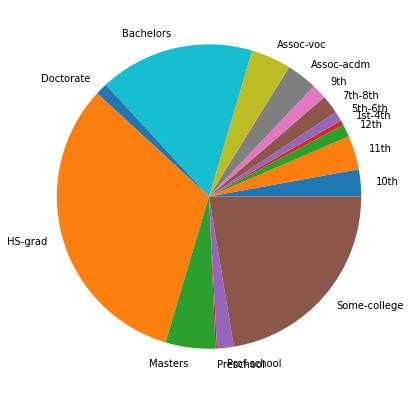

In [13]:
plt.figure(figsize = (7, 7))
plt.pie(eduCount, labels = eduList)
plt.show()

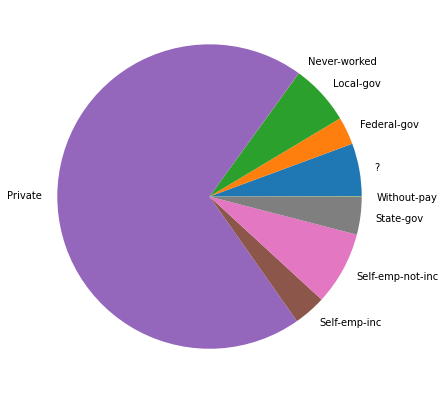

In [14]:
plt.figure(figsize = (7, 7))
plt.pie(workclassCount, labels = workclassList)
plt.show()

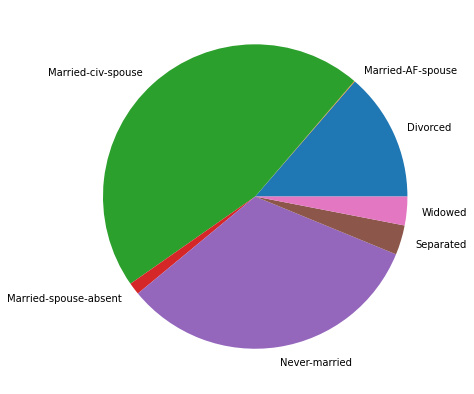

In [15]:
plt.figure(figsize = (7, 7))
plt.pie(maritalCount, labels = maritalList)
plt.show()

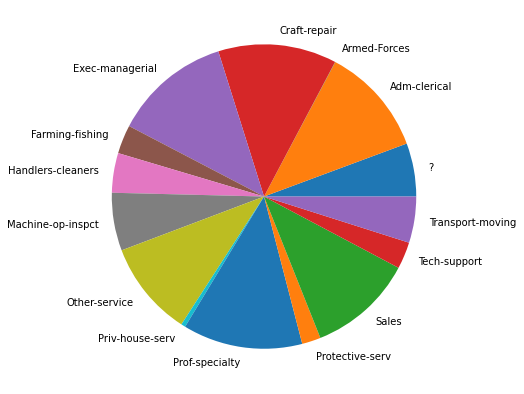

In [16]:
plt.figure(figsize = (7, 7))
plt.pie(occupationCount, labels = occupationList)
plt.show()

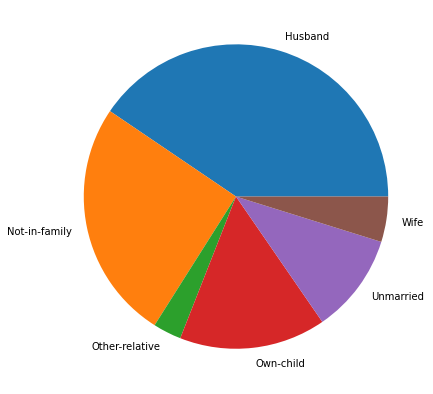

In [17]:
plt.figure(figsize = (7, 7))
plt.pie(relationshipCount, labels = relationshipList)
plt.show()

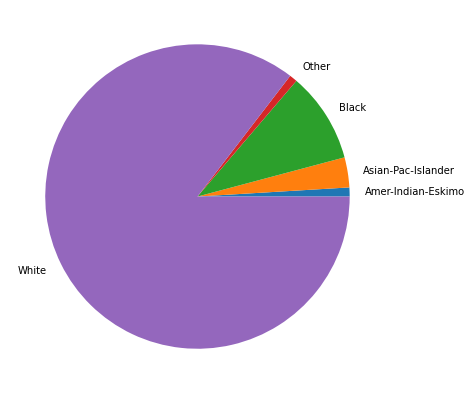

In [18]:
plt.figure(figsize = (7, 7))
plt.pie(raceCount, labels = raceList)
plt.show()

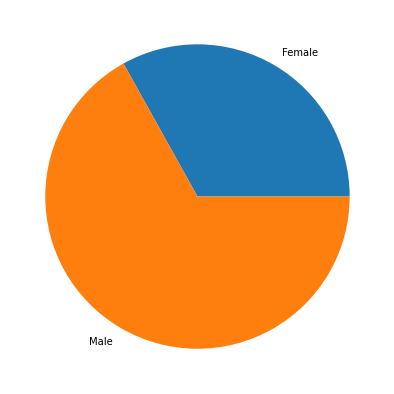

In [19]:
plt.figure(figsize = (7, 7))
plt.pie(sexCount, labels = sexList)
plt.show()

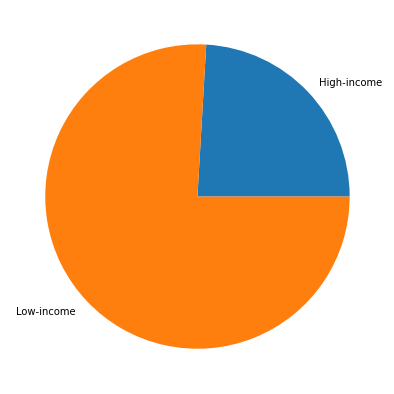

In [20]:
plt.figure(figsize = (7, 7))
plt.pie(incomeCount, labels = incomeList)
plt.show()

**Observation:**
1. The `pie-charts` compare parts of different attributes to the whole. It helps picturing which types of data exist more in the dataset and can influence making any decision.
2. From the pie-chart we can observe the largest employee comes from-
    * Gender: `Male`
    * Race: `White`
    * Relationship: `Husband`
    * Marital-status: `Married-civ-spouse`
    * Education: `HS-grad`
3. We can also observe that, most of the people work on the `private` sector.
4. Only 22% people earn high.

#### II.I.III.III. Bar Graph

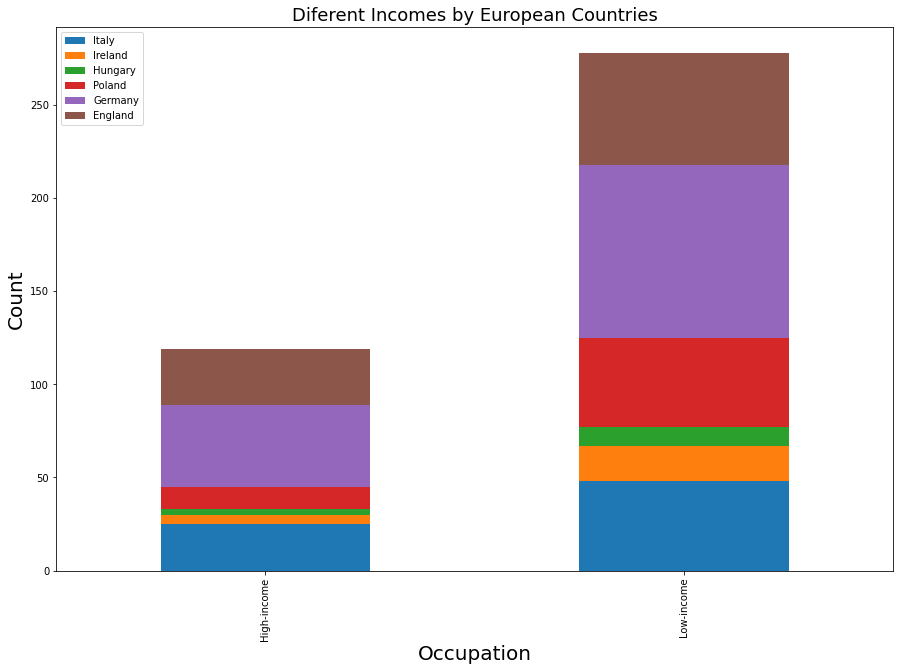

In [21]:
it = df_c[df_c.native_country == 'Italy']['income'].value_counts(sort=False)
ir = df_c[df_c.native_country == 'Ireland']['income'].value_counts(sort=False)
h = df_c[df_c.native_country == 'Hungary']['income'].value_counts(sort=False)
po = df_c[df_c.native_country == 'Poland']['income'].value_counts(sort=False)
g = df_c[df_c.native_country == 'Germany']['income'].value_counts(sort=False)
e = df_c[df_c.native_country == 'England']['income'].value_counts(sort=False)

pd.DataFrame({'Italy': it, 'Ireland': ir, 'Hungary': h, 'Poland': po, 'Germany': g, 'England': e}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("Diferent Incomes by European Countries", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

**Observation:**
1. From this chart we can observe that `Germany` have the highest employed among the `European` countries.

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

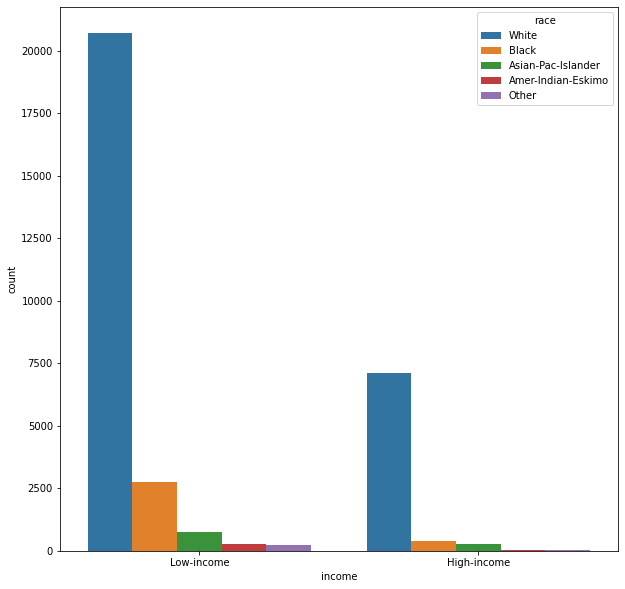

In [22]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df_c['income'],hue=df_c['race'])

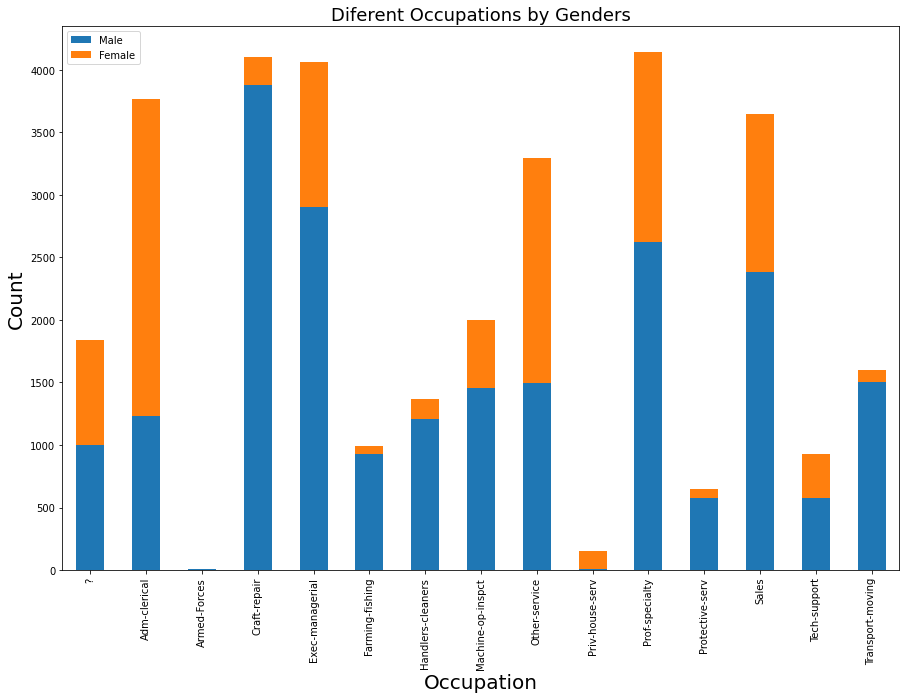

In [23]:
m = df_c[df_c.sex == 'Male']['occupation'].value_counts(sort=False)
w = df_c[df_c.sex == 'Female']['occupation'].value_counts(sort=False)
pd.DataFrame({'Male': m, 'Female': w}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("Diferent Occupations by Genders", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

**Observation:**
1. People from `White` and `Black` race acquire more jobs.
2. More female employee work in `Adm-clerical` and `Priv-house-serv`.
3. There is a `50-50` ratio in the `Other-service`.

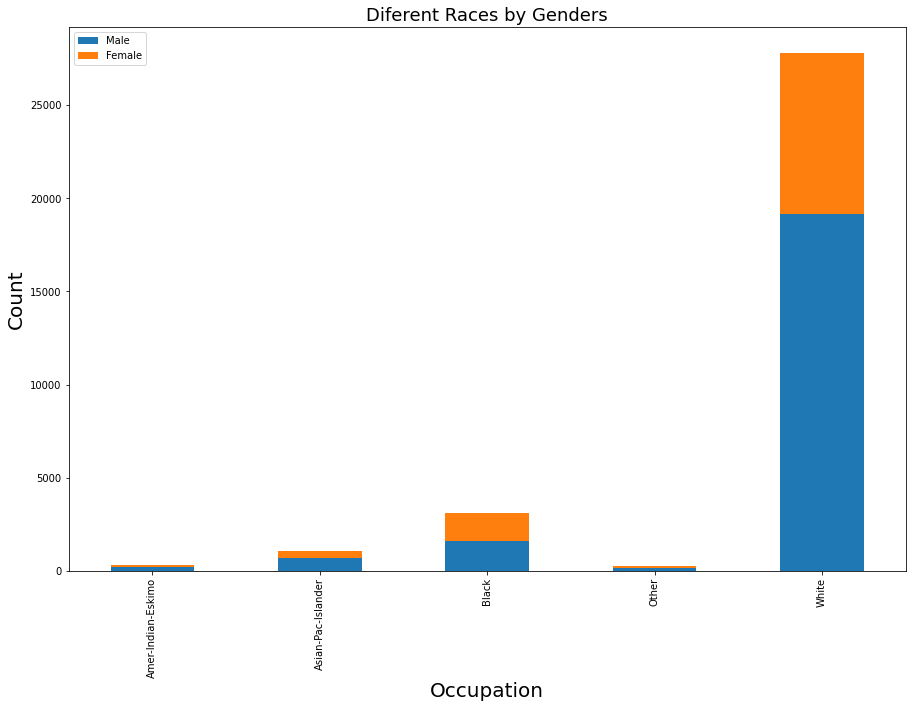

In [24]:
m = df_c[df_c.sex == 'Male']['race'].value_counts(sort=False)
w = df_c[df_c.sex == 'Female']['race'].value_counts(sort=False)
pd.DataFrame({'Male': m, 'Female': w}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("Diferent Races by Genders", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

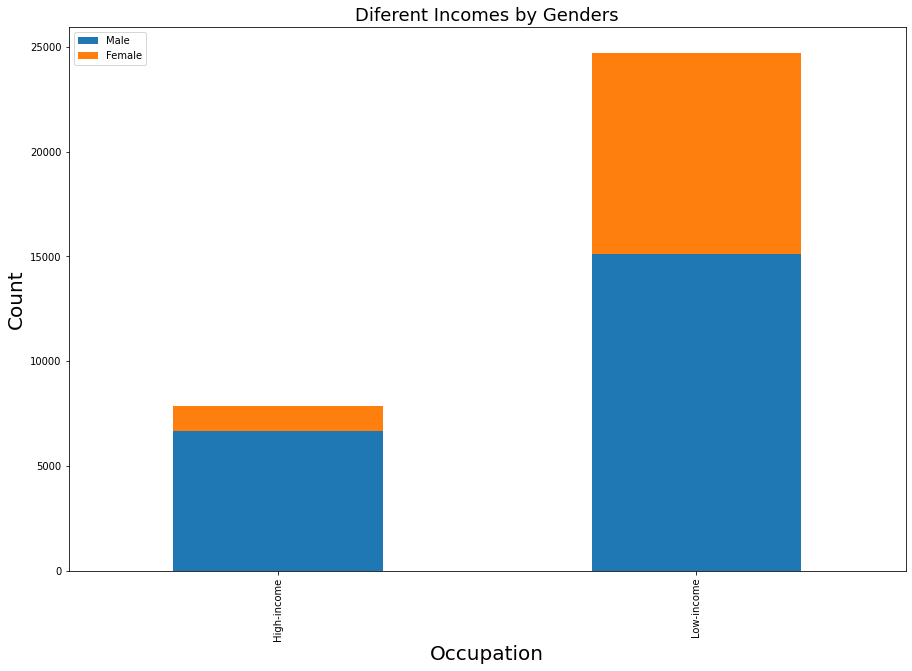

In [25]:
m = df_c[df_c.sex == 'Male']['income'].value_counts(sort=False)
w = df_c[df_c.sex == 'Female']['income'].value_counts(sort=False)
pd.DataFrame({'Male': m, 'Female': w}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("Diferent Incomes by Genders", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

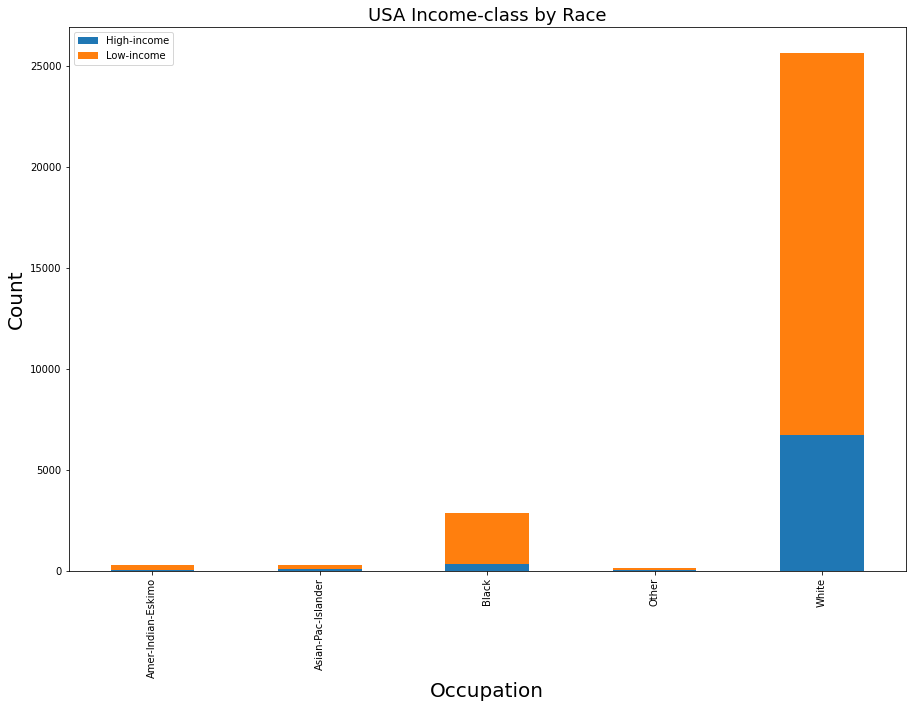

In [26]:
h = df_c[(df_c.income == 'High-income') & (df_c['native_country'] == 'United-States')]['race'].value_counts(sort=False)
l = df_c[(df_c.income == 'Low-income') & (df_c['native_country'] == 'United-States')]['race'].value_counts(sort=False)
pd.DataFrame({'High-income': h, 'Low-income': l}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("USA Income-class by Race", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

**Observation:**
1. There is a small number of female employees who earn more.
2. In `USA`, people from the `white` race hold more `high-income` jobs.

### II.I.IV. Preliminary observation

We made individual observations on the different plotting above. To summarize-

* We observed `gender` and `race` discrimination.
* There are more jobs in the job-market for medium education level (i.e., high-school graduates).
* There is no clear winner for a specific type of job, which is also true while comparing to society.

### II.I.V. Preprocessing for Classification

As I plan to run classification algorithms on this dataset to classify higher and lower-income groups, I made further data processing to convert the text data to numeric ones. This is a prerequisite for the algorithms I implemented and described later.

In [27]:
encoding_dict = {"workclass": {'State-gov':1, 'Self-emp-not-inc':2, 'Private':3, 'Federal-gov':4,
                               'Local-gov':5, '?':6, 'Self-emp-inc':7, 'Without-pay':8, 'Never-worked':9},
                 "education": {'Bachelors':1, 'HS-grad':2, '11th':3, 'Masters':4, '9th':5, 'Some-college':6,
                               'Assoc-acdm':7, 'Assoc-voc':8, '7th-8th':9, 'Doctorate':10, 'Prof-school':11,
                               '5th-6th':12, '10th':13, '1st-4th':14, 'Preschool':15, '12th':16},
                 "marital_status": {'Never-married':1, 'Married-civ-spouse':2, 'Divorced':3,
                                    'Married-spouse-absent':4, 'Separated':5, 'Married-AF-spouse':6, 'Widowed':7},
                 "occupation": {'Adm-clerical':1, 'Exec-managerial':2, 'Handlers-cleaners':3,
                                'Prof-specialty':4, 'Other-service':5, 'Sales':6, 'Craft-repair':7,
                                'Transport-moving':8, 'Farming-fishing':9, 'Machine-op-inspct':10,
                                'Tech-support':11, '?':12, 'Protective-serv':13, 'Armed-Forces':14,
                                'Priv-house-serv':15},
                 "relationship": {'Not-in-family':1, 'Husband':2, 'Wife':3, 'Own-child':4, 'Unmarried':5,
                                  'Other-relative':6},
                 "race": {'White':1, 'Black':2, 'Asian-Pac-Islander':3, 'Amer-Indian-Eskimo':4, 'Other':5},
                 "sex": {'Male':-1, 'Female':1},
                 "native_country": {'United-States':1, 'Cuba':2, 'Jamaica':3, 'India':4, '?':5, 'Mexico':6,
                                    'South':7, 'Puerto-Rico':8, 'Honduras':9, 'England':10, 'Canada':11,
                                    'Germany':12, 'Iran':13, 'Philippines':14, 'Italy':15, 'Poland':16,
                                    'Columbia':17, 'Cambodia':18, 'Thailand':19, 'Ecuador':20, 'Laos':21,
                                    'Taiwan':22, 'Haiti':23, 'Portugal':24, 'Dominican-Republic':25,
                                    'El-Salvador':26, 'France':27, 'Guatemala':28, 'China':29, 'Japan':30,
                                    'Yugoslavia':31, 'Peru':32, 'Outlying-US(Guam-USVI-etc)':33, 'Scotland':34,
                                    'Trinadad&Tobago':35, 'Greece':36, 'Nicaragua':37, 'Vietnam':38, 'Hong':39,
                                    'Ireland':40, 'Hungary':41, 'Holand-Netherlands':42},
                 "income": {'Low-income':-1, 'High-income':1},
                }

df_c.replace(encoding_dict, inplace = True)

# observe pairwise correlation of columns using library function
df_c.corr()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
age,1.000000,0.082380,-0.076646,0.007767,0.036527,0.424606,0.017201,-0.217767,-0.040000,-0.088832,0.077674,0.057775,0.068756,-0.011572,0.234037
workclass,0.082380,1.000000,-0.006314,0.011666,0.011343,0.035949,0.217072,0.015524,0.009359,0.019347,0.041172,0.012510,-0.028084,-0.010246,0.047203
fnlwgt,-0.076646,-0.006314,1.000000,0.024188,-0.043195,-0.023527,0.007892,0.017142,0.000500,-0.026858,0.000432,-0.010252,-0.018768,0.035910,-0.009463
education,0.007767,0.011666,0.024188,1.000000,-0.279614,0.008507,0.074961,0.044319,0.029638,0.000550,0.024154,-0.003192,-0.050025,0.067619,-0.046218
education_num,0.036527,0.011343,-0.043195,-0.279614,1.000000,-0.065996,-0.242997,-0.141075,-0.039760,-0.012280,0.122630,0.079923,0.148123,-0.066044,0.335154
marital_status,0.424606,0.035949,-0.023527,0.008507,-0.065996,1.000000,0.006524,0.029083,0.012722,0.181870,0.004460,0.006833,-0.000277,0.001912,0.002644
occupation,0.017201,0.217072,0.007892,0.074961,-0.242997,0.006524,1.000000,-0.016150,0.016586,-0.147779,-0.045060,-0.023963,-0.045240,0.019578,-0.104691
relationship,-0.217767,0.015524,0.017142,0.044319,-0.141075,0.029083,-0.016150,1.000000,0.096808,0.273414,-0.044045,-0.050498,-0.184873,0.042444,-0.171294
race,-0.040000,0.009359,0.000500,0.029638,-0.039760,0.012722,0.016586,0.096808,1.000000,0.067840,-0.007991,-0.017190,-0.033115,0.241650,-0.067713
sex,-0.088832,0.019347,-0.026858,0.000550,-0.012280,0.181870,-0.147779,0.273414,0.067840,1.000000,-0.048480,-0.045567,-0.229309,0.005977,-0.215980


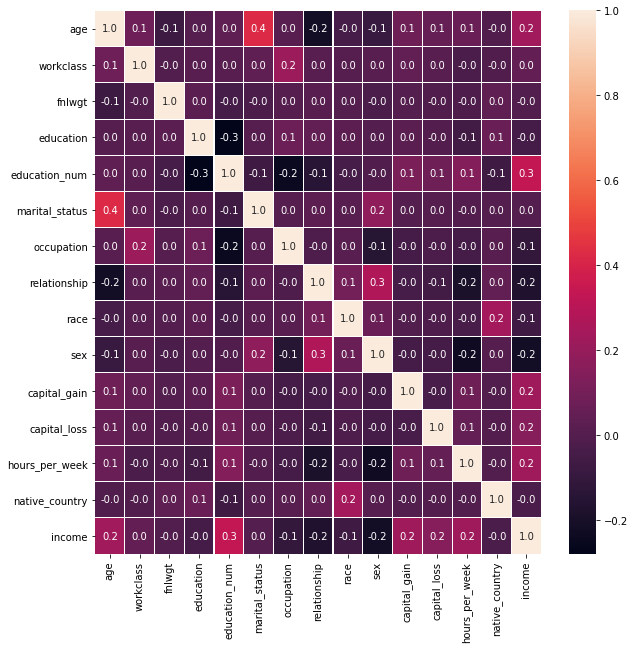

In [28]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(df_c.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

# III. Methods

In this section, I presented the step by step process of building different network types using the Keras Sequential model framework. Finally, I calculated and plotted the `accuracy` of those models.

Agenda:
- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow (or Keras) codes. 
- Explain how you apply your model to your data.

## III.I. Model Selection

In this assignment, I build 3 deep networks with more than 5 layers using the Keras Sequential model framework. We can create different neural network structures (with the help of the Sequential models in Keras) by changing the number of layers and/or changing the neurons and activation functions in those layers. Besides this, there are different choices of optimizers that we can apply to build different networks.

Due to the limited scope of this assignment, I used fixed optimizer (i.e. `Adam` optimizer), activation function (i.e. `tanh`), epochs (i.e. $20$), and batch size (i.e. $1000$) for all my model choices. I only change either the number of hidden layers (i.e., $5$, $9$, etc.) and the number of hidden units throughout my experiment. In this section, I will justify the choice of my considered structures. In the later section, I will share my observations while applying those structures to the data I described earlier.

### III.I.I. Selection Choice: Model 1

I build the first model with an input layer, followed by `five hidden layers` having a fixed number of neurons (i.e., $64$ in this case), and the output layer. By this structure, I want to see how the Sequential model works with a fixed number of neurons in the hidden layers and having the same activation function.

### III.I.II. Selection Choice: Model 2

In the second model, I kept the same number of hidden layers (i.e., $5$) that I used in Model-1. I changed the number of hidden units ranging from $64$ to $1024$ (incremented by $2x$ in consecutive layers). I also used `tanh` activation function in each layer (including input, hidden, and output) and `Adam` optimizer. I like to observe the performance change by this structure while using the same number of hidden layers with a different number of hidden units.

### III.I.III. Selection Choice: Model 3

The third and final model changed both the number of hidden layers (i.e., $9$) and the number of hidden units. This time, I first increment the hidden units from $64$ to $1024$ (by $2x$ in consecutive layers) and then decrement from $1024$ to $64$ (by $2x$ in consecutive layers). Like my previous models, I used `tanh` activation function in each layer (including input, hidden, and output) and `Adam` optimizer (with a fixed learning rate $0.001$). I would like to observe the performance changes with a different number of hidden layers by this structure.

## III.II. Experiments

In [ ]:
import numpy as np
import pandas as pd
import timeit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras import models, layers
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

### III.II.I. Feature Selection

After the long class discussion about `feature selection` for the classification problem, I made an educated guess in this regard. From all the feature sets, I picked `age`, `education_num`, `capital_gain`, `capital_loss`, and `hours_per_week` features to make the classification on `income`.

Before feeding data to my models, I split data for training and testing (ratio $80-20$) and normalized the feature data.

In [10]:
def normalize(X):
    return (X / X.max())

In [11]:
# list of classification features (educated guess)
classification_features = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# list of target features
target_classification_features = ['income']

In [12]:
for feature in classification_features:
    df_c[feature] = normalize(df_c[feature])

In [13]:
df_c.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.433333,1,77516,1,0.8125,1,1,1,1,-1,0.021740,0.0,0.404040,1,-1
1,0.555556,2,83311,1,0.8125,2,2,2,1,-1,0.000000,0.0,0.131313,1,-1
2,0.422222,3,215646,2,0.5625,3,3,1,1,-1,0.000000,0.0,0.404040,1,-1
3,0.588889,3,234721,3,0.4375,2,3,2,2,-1,0.000000,0.0,0.404040,1,-1
4,0.311111,3,338409,1,0.8125,2,4,3,2,1,0.000000,0.0,0.404040,2,-1
5,0.411111,3,284582,4,0.8750,2,2,3,1,1,0.000000,0.0,0.404040,1,-1
6,0.544444,3,160187,5,0.3125,4,5,1,2,1,0.000000,0.0,0.161616,3,-1
7,0.577778,2,209642,2,0.5625,2,2,2,1,-1,0.000000,0.0,0.454545,1,1
8,0.344444,3,45781,4,0.8750,1,4,1,1,1,0.140841,0.0,0.505051,1,1
9,0.466667,3,159449,1,0.8125,2,2,2,1,-1,0.051781,0.0,0.404040,1,1


In [14]:
# randomly pick 30K data
data_c = df_c.sample(30000)

In [15]:
X_c = data_c[classification_features].copy()
X_c.shape

(30000, 5)

In [16]:
T_c = data_c[target_classification_features].copy()
T_c = T_c.values.reshape(T_c.shape[0],1)
T_c.shape

(30000, 1)

In [17]:
normalize = StandardScaler()
norm_x = normalize.fit_transform(X_c)
X_train, X_test, T_train, T_test = train_test_split(norm_x, T_c, test_size=0.2, random_state=1)

In [18]:
print("X_train shape: {}".format(X_train.shape))
print("T_train shape: {}".format(T_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("T_test shape: {}".format(T_test.shape))

X_train shape: (24000, 5)
T_train shape: (24000, 1)
X_test shape: (6000, 5)
T_test shape: (6000, 1)


In [19]:
opt_adam = keras.optimizers.Adam(learning_rate=0.001)
opt_rmsprop = keras.optimizers.RMSprop(lr=0.0001)

### III.II.II. Code Explanation: Model-1

In this model, I have invoked the Sequential model of Keras and added an input layer (with $5$ neurons, similar to data shape), $5$ hidden layers (containing a fixed number of neurons, i.e., $64$ in this case), and the output layer. Then while compiling the model, passed the `Adam` optimizer, `binary_crossentropy` as the loss function, and `accuracy` as the metric. Finally, fit the model with the training data. Also measured the time to build and train the model for extra credit.

In [48]:
start_time = timeit.default_timer()

# Define Sequential model with 5 hidden layers
model_1 = keras.Sequential(
    [
        layers.Dense(units=5, input_dim=5, activation="tanh", name="input"),
        layers.Dense(units=64, activation="tanh", name="hidden_1"),
        layers.Dense(units=64, activation="tanh", name="hidden_2"),
        layers.Dense(units=64, activation="tanh", name="hidden_3"),
        layers.Dense(units=64, activation="tanh", name="hidden_4"),
        layers.Dense(units=64, activation="tanh", name="hidden_5"),
        layers.Dense(units=1, activation="tanh", name="output"),
    ]
)

# compile the keras model
model_1.compile(opt_adam, loss='binary_crossentropy', metrics=['accuracy'])

# fit the keras model on the dataset
res_1 = model_1.fit(X_train, T_train, epochs=20, batch_size=1000)

elapsed = timeit.default_timer() - start_time
print("Time taken by Model-1: {} sec.".format(elapsed))

print(model_1.summary())

Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: -7.9434 - accuracy: 0.0492
Epoch 2/20
24/24 [==============================] - 0s 4ms/step - loss: -8.4754 - accuracy: 0.0417
Epoch 3/20
24/24 [==============================] - 0s 4ms/step - loss: -8.6377 - accuracy: 0.0562
Epoch 4/20
24/24 [==============================] - 0s 5ms/step - loss: -8.6508 - accuracy: 0.0492
Epoch 5/20
24/24 [==============================] - 0s 5ms/step - loss: -8.6797 - accuracy: 0.0535
Epoch 6/20
24/24 [==============================] - 0s 5ms/step - loss: -8.4022 - accuracy: 0.0587
Epoch 7/20
24/24 [==============================] - 0s 5ms/step - loss: -8.5353 - accuracy: 0.0767
Epoch 8/20
24/24 [==============================] - 0s 5ms/step - loss: -6.9089 - accuracy: 0.0229
Epoch 9/20
24/24 [==============================] - 0s 5ms/step - loss: -8.0218 - accuracy: 0.0201
Epoch 10/20
24/24 [==============================] - 0s 5ms/step - loss: -8.3223 - accuracy: 0.0666
Epoch 11/

### III.II.III. Code Explanation: Model-2

In this model, I have invoked the Sequential model of Keras and added an input layer (with $5$ neurons, similar to data shape), $5$ hidden layers, and the output layer. The first hidden layer contains $64$ neurons, and each of the next consecutive hidden layers contains $2x$ incremented neurons from the previous layer. All the layers contain the same activation function (i.e., `tanh` in this case). Then while compiling the model, passed the `Adam` optimizer, `binary_crossentropy` as the loss function, and `accuracy` as the metric. Finally, fit the model with the training data. Also measured the time to build and train the model for extra credit.

In [60]:
start_time = timeit.default_timer()

# Define Sequential model with 5 hidden layers
model_2 = keras.Sequential(
    [
        layers.Dense(units=5, input_dim=5, activation="tanh", name="input"),
        layers.Dense(units=64, activation="tanh", name="hidden_1"),
        layers.Dense(units=128, activation="tanh", name="hidden_2"),
        layers.Dense(units=256, activation="tanh", name="hidden_3"),
        layers.Dense(units=512, activation="tanh", name="hidden_4"),
        layers.Dense(units=1024, activation="tanh", name="hidden_5"),
        layers.Dense(units=1, activation="tanh", name="output"),
    ]
)

# compile the keras model
model_2.compile(opt_adam, loss='binary_crossentropy', metrics=['accuracy'])

# fit the keras model on the dataset
res_2 = model_2.fit(X_train, T_train, epochs=20, batch_size=1000)

elapsed = timeit.default_timer() - start_time
print("Time taken by Model-2: {} sec.".format(elapsed))

print(model_2.summary())

Epoch 1/20
24/24 [==============================] - 2s 63ms/step - loss: -6.5361 - accuracy: 0.0412
Epoch 2/20
24/24 [==============================] - 1s 52ms/step - loss: -7.2677 - accuracy: 0.0241
Epoch 3/20
24/24 [==============================] - 1s 53ms/step - loss: -7.2688 - accuracy: 0.0241
Epoch 4/20
24/24 [==============================] - 1s 55ms/step - loss: -7.2711 - accuracy: 0.0241
Epoch 5/20
24/24 [==============================] - 1s 54ms/step - loss: -7.2725 - accuracy: 0.0241
Epoch 6/20
24/24 [==============================] - 1s 54ms/step - loss: -7.2725 - accuracy: 0.0241
Epoch 7/20
24/24 [==============================] - 1s 57ms/step - loss: -7.2725 - accuracy: 0.0241
Epoch 8/20
24/24 [==============================] - 2s 78ms/step - loss: -7.2725 - accuracy: 0.0241
Epoch 9/20
24/24 [==============================] - 2s 70ms/step - loss: -7.2725 - accuracy: 0.0241
Epoch 10/20
24/24 [==============================] - 2s 77ms/step - loss: -7.2725 - accuracy: 0.0241

### III.II.IV. Code Explanation: Model-3

In this model, I have invoked the Sequential model of Keras and added an input layer (with $5$ neurons, similar to data shape), $9$ hidden layers (different from the previous models), and the output layer. The first hidden layer contains $64$ neurons, and each of the next $4$ consecutive hidden layers contains $2x$ incremented neurons from the previous layer. After that, I decremented the number of neurons in each of the rest hidden layers by a factor of $2x$. All the layers contain the same activation function (i.e., `tanh` in this case). Then while compiling the model, passed the `Adam` optimizer, `binary_crossentropy` as the loss function, and `accuracy` as the metric. Finally, fit the model with the training data. Also measured the time to build and train the model for extra credit.

In [70]:
start_time = timeit.default_timer()

# Define Sequential model with 9 hidden layers
model_3 = keras.Sequential(
    [
        layers.Dense(units=5, input_dim=5, activation="tanh", name="input"),
        layers.Dense(units=64, activation="tanh", name="hidden_1"),
        layers.Dense(units=128, activation="tanh", name="hidden_2"),
        layers.Dense(units=256, activation="tanh", name="hidden_3"),
        layers.Dense(units=512, activation="tanh", name="hidden_4"),
        layers.Dense(units=1024, activation="tanh", name="hidden_5"),
        layers.Dense(units=512, activation="tanh", name="hidden_6"),
        layers.Dense(units=256, activation="tanh", name="hidden_7"),
        layers.Dense(units=128, activation="tanh", name="hidden_8"),
        layers.Dense(units=64, activation="tanh", name="hidden_9"),
        layers.Dense(units=1, activation="tanh", name="output"),
    ]
)

# compile the keras model
model_3.compile(opt_adam, loss='binary_crossentropy', metrics=['accuracy'])

# fit the keras model on the dataset
res_3 = model_3.fit(X_train, T_train, epochs=20, batch_size=1000)

elapsed = timeit.default_timer() - start_time
print("Time taken by Model-3: {} sec.".format(elapsed))

print(model_3.summary())

Epoch 1/20
24/24 [==============================] - 3s 105ms/step - loss: -4.8437 - accuracy: 0.0417
Epoch 2/20
24/24 [==============================] - 3s 109ms/step - loss: -6.3282 - accuracy: 0.1198
Epoch 3/20
24/24 [==============================] - 2s 99ms/step - loss: -6.5991 - accuracy: 0.1094
Epoch 4/20
24/24 [==============================] - 3s 108ms/step - loss: -6.8386 - accuracy: 0.1147
Epoch 5/20
24/24 [==============================] - 2s 103ms/step - loss: -7.1055 - accuracy: 0.0604
Epoch 6/20
24/24 [==============================] - 2s 102ms/step - loss: -7.6367 - accuracy: 0.0000e+00
Epoch 7/20
24/24 [==============================] - 2s 96ms/step - loss: -7.9491 - accuracy: 0.0000e+00
Epoch 8/20
24/24 [==============================] - 3s 108ms/step - loss: -7.9516 - accuracy: 0.0000e+00
Epoch 9/20
24/24 [==============================] - 3s 115ms/step - loss: -7.9510 - accuracy: 0.0000e+00
Epoch 10/20
24/24 [==============================] - 3s 108ms/step - loss: -7

# IV. Results

Agenda:
- Presents the results of applications of your deep networks.
- Visualize the results 
- Discuss the choice of network structures and performance of it as you change the structures.  
- What do you think about the results?

For each of the models (described in the previous section), I have measured both the training and testing data's accuracy. The model's accuracy on training data helps us understand how our model fits the training data. The model accuracy on testing data helps us understand how better our model can perform on the unknown data. Besides this, I have added the plot for the change of model accuracy over epochs. This will help us understand whether incrementing or decrementing of epochs will change the models' performance.

## IV.I. Model-1: Result Analysis

With Model-1, I get $5.01%$ model accuracy on the training data and $4.90%$ model accuracy on the testing data. The performance of this model is not satisfactory. However, from the plot of model accuracy in different epocs, we can observe the ups and downs in different epochs. From this, we might consider increasing the number of epochs to check whether the model's performance increase or not.

In [49]:
# evaluate the keras model
_, accuracy_train_1 = model_1.evaluate(X_train, T_train, verbose=0)

print('Model-1 Accuracy on training data: %.2f' % (accuracy_train_1 * 100))

Model-1 Accuracy on training data: 5.01


In [50]:
# evaluate the keras model
_, accuracy_test_1 = model_1.evaluate(X_test, T_test, verbose=0)

print('Model-1 Accuracy on test data: %.2f' % (accuracy_test_1 * 100))

Model-1 Accuracy on test data: 4.90


Text(0, 0.5, 'Model Accuracy')

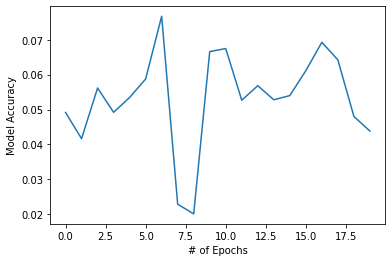

In [51]:
plt.plot(res_1.history['accuracy'])
plt.xlabel("# of Epochs")
plt.ylabel("Model Accuracy")

## IV.II. Model-2: Result Analysis

With Model-2, I get $2.41%$ model accuracy on the training data and $2.38%$ model accuracy on the testing data. Again, this performance is quite unsatisfactory. From the plot of model accuracy in different epochs, we can observe that the model's performance straight goes down and never increased after the first epoch. From this, we might consider this model is not very suitable for this dataset.

In [61]:
# evaluate the keras model
_, accuracy_train_2 = model_2.evaluate(X_train, T_train, verbose=0)

print('Model-2 Accuracy on training data: %.2f' % (accuracy_train_2 * 100))

Model-2 Accuracy on training data: 2.41


In [62]:
# evaluate the keras model
_, accuracy_test_2 = model_2.evaluate(X_test, T_test, verbose=0)

print('Model-2 Accuracy on test data: %.2f' % (accuracy_test_2 * 100))

Model-2 Accuracy on test data: 2.38


Text(0, 0.5, 'Model Accuracy')

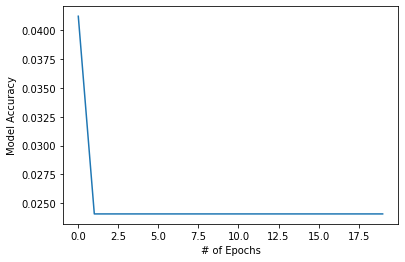

In [63]:
plt.plot(res_2.history['accuracy'])
plt.xlabel("# of Epochs")
plt.ylabel("Model Accuracy")

## IV.III. Model-3: Result Analysis

With Model-2, I get $0.00%$ model accuracy on both the training and testing data. This performance is not acceptable at all. However, interestingly from the plot of model accuracy in different epochs, we can observe this model's highest accuracy in epoch-1 (i.e., $12%$). We might consider reducing the training epoch to see whether it improves the overall model performance.

In [82]:
# evaluate the keras model
_, accuracy_train_3 = model_3.evaluate(X_train, T_train, verbose=0)

print('Model-3 Accuracy on training data: %.2f' % (accuracy_train_3 * 100))

Model-3 Accuracy on training data: 0.00


In [83]:
# evaluate the keras model
_, accuracy_test_3 = model_3.evaluate(X_test, T_test, verbose=0)

print('Model-3 Accuracy on test data: %.2f' % (accuracy_test_3 * 100))

Model-3 Accuracy on test data: 0.00


Text(0, 0.5, 'Model Accuracy')

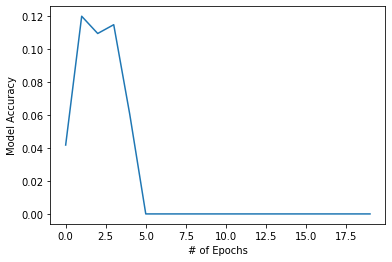

In [84]:
plt.plot(res_3.history['accuracy'])
plt.xlabel("# of Epochs")
plt.ylabel("Model Accuracy")

## IV.IV. Observations

In this assignment, I have implemented three different neural network structures and used them to classify the dataset [[1]](https://www.kaggle.com/lodetomasi1995/income-classification). I expected that Model-3 would produce better accuracy but observed the opposite one. This might be because of my limited knowledge of neural networks. Also, I observed performance fluctuation in a different run.

As it is easy to observe, the overall performance is poor for all the models we considered. There are a couple of future directions we might consider to improve the performance:

1. We can consider exploring different normalization functions (i.e., Z-Score, Min-Max, etc.).
2. We can consider some advanced feature selection techniques for this dataset. As mentioned earlier, I made an educated guess on feature selection.
3. We can consider applying K-fold cross-validation to select good parameters for the neural networks (i.e., number of hidden layers, neurons per layer, etc.).
4. I only considered `Adam` optimizers for all the models. We can consider other optimizers (i.e., RMSprop) for the neural networks.
5. I only considered `tanh` activation function in all the layers. Mixing different activation functions or even applying other activation functions (i.e. `relu`, `elu`, etc.) in each layer might be a good option to explore.

Due to this assignment's limited scope, I could not explore and find the right combination for my models. However, the directions listed above might be a good way to explore it further.

# V. Conclusions

Agenda
- Discuss the challenges or something that you learned. 
- If you have any suggestions about the assignment, you can write about it.

I really enjoyed working on this assignment. It helped me gain an initial idea about deep neural network structure. Besides, I have achieved first-hand experience on this by implementing and exploring three different network structures. The future scopes to improve the model's performance has been listed, and it seems there is a lot more that we can do in this assignment. However, again, we have limited scope to explore all this in a single assignment. Maybe we should consider this assignment as the first milestone in deep neural networks and explore more in the future.

# VI. Optional Extra Credits

- [OPT 1] Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources or MAMBA cluster for this test. 
- ~[OPT 2] Implement one of neural networks in the chart above and apply it to some real data.~

I choose to work on `Option-1` to gain one extra credit point. It is required to provide `Credit Card` information to access the free 2 hours of GPU resources in [FloydHub](https://www.floydhub.com/). As it was not very convenient for me, I used GoogleColab's GPU support to measure and compare the models' training speed. You can check my notebook in [GoogleColab](https://drive.google.com/file/d/1kw2TdhWhoX9FxWDezGGo--43tTiI9udp/view?usp=sharing). Here is the comparison of the training speed in CPU Vs. GPU.

<table>
  <thead>
    <tr>
      <th>Models</th>
      <th>CPU Time (sec.)</th>
      <th>GPU Time (sec.)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td align="middle">Model-1<br><br>Model-2<br><br>Model-3</td>
      <td align="middle">3.89<br><br>37.64<br><br>64.04</td>
      <td align="middle">1.75<br><br>2.24<br><br>2.85</td>
    </tr>
    <tr>
      <td colspan="3" align="middle">Table 1: Model training time comparison (CPU Vs. GPU).</td>
    </tr>
  </tbody>
</table>

From this, we can easily observe that we can achieve $2$ to $22$ times performance gain while using GPU to train our deep neural network models comparing to CPU.

# VII. References

1. Lorenzo De Tomasi (2018). Income classification, Prediction task is to determine whether a person makes over 50K a year, Version 1. Retrieved September 22, 2020 from https://www.kaggle.com/lodetomasi1995/income-classification

# VIII. Grading

Only well-written notebook will be graded. Please follow the structure and fill in as the other assignments. 

extra credit points | description
--|:--
1 | First structure (implementation, explanation, plot results, discussion of results)
 | Second structure (implementation, explanation, plot results, discussion of results)
 | Third structure (implementation, explanation, plot results, discussion of results)
1 | Explaining and discussing the reason for the selection (Any relation to your data?)
  | Comparing the results, discuss or verify your choice 


There are a lot of different neural networks as you see in the figure below. The image is just for your reference but you **are not required** to implement any other types of neurons such as LSTM, CNN, etc. You are fine to use basic neurons with different number of layers and hidden units to fulfil the requirement of this assignment.

<img src="https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67" width=700 />

